# **Context**

*To understand the given unstructured CSV files, I utilized Python libraries and Data visualization libraries like matplotlib to review and understand the datasets seperately*

I have created three different markdowns for three given files, where I have commented on each line what the code exactly performs.

## **Understanding and cleaning the "User" file**


This part includes:


*   Handling Null values
*   Converting the fields into appropriate data type
*   Checking any duplicated data
*   Understanding the distribution of users






In [ ]:
# Import appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset into a pandas data frame
user = pd.read_csv('/content/USER_TAKEHOME.csv')
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [ ]:
# Check the data types in the data frame to understand if they are mismatched with the data type given in the file
user.dtypes

,0
ID,object
CREATED_DATE,object
BIRTH_DATE,object
STATE,object
LANGUAGE,object
GENDER,object


In [ ]:
# Check for null values in all the fields
user.isnull().sum()

,0
ID,0
CREATED_DATE,0
BIRTH_DATE,3675
STATE,4812
LANGUAGE,30508
GENDER,5892


In [ ]:
# Dropping all the Null values of birth_date. Since we will be using birthdates to differentiate users of different ages, we do not need any null values in our analysis
user.dropna(subset=['BIRTH_DATE'], inplace=True)
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11.000 Z,1999-10-27 04:00:00.000 Z,NY,en,female


In [ ]:
# Converting BIRTH_DATE and CREATE_DATE column current format to date format for easy analysis
user['BIRTH_DATE']= pd.to_datetime(user['BIRTH_DATE'],errors='coerce')
user['CREATED_DATE']= pd.to_datetime(user['CREATED_DATE'],errors='coerce')
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24,2000-08-11,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03,2001-09-24,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31,1994-10-28,FL,es-419,female
4,653cf5d6a225ea102b7ecdc2,2023-10-28,1972-03-19,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23,1999-10-27,NY,en,female


In [ ]:
# Checking if the format is been changed
user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96325 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            96325 non-null  object        
 1   CREATED_DATE  96325 non-null  datetime64[ns]
 2   BIRTH_DATE    96325 non-null  datetime64[ns]
 3   STATE         93629 non-null  object        
 4   LANGUAGE      65849 non-null  object        
 5   GENDER        94034 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 7.2+ MB


In [ ]:
# Checking if any duplicated data exists. Since ID is a unique key for our analysis, make sure that there is no more than one user of the same user ID
print("Duplicated data:",user.duplicated().sum())

Duplicated data: 0


In [ ]:
# Finding all the unique values of states, languages, gender in the dataset

print("number of states:",len(user['STATE'].unique()))
print("\nUnique Genders:", user["GENDER"].unique())
print("Unique States:", user["STATE"].unique())
print("Unique Languages:", user["LANGUAGE"].unique())

number of states: 53

Unique Genders: ['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']
Unique States: ['CA' 'PA' 'FL' 'NC' 'NY' 'IN' nan 'OH' 'TX' 'NM' 'PR' 'CO' 'AZ' 'RI' 'MO'
 'NJ' 'MA' 'TN' 'LA' 'NH' 'WI' 'IA' 'GA' 'VA' 'DC' 'KY' 'SC' 'MN' 'WV'
 'DE' 'MI' 'IL' 'MS' 'WA' 'KS' 'CT' 'OR' 'UT' 'MD' 'OK' 'NE' 'NV' 'AL'
 'AK' 'AR' 'HI' 'ME' 'ND' 'ID' 'WY' 'MT' 'SD' 'VT']
Unique Languages: ['es-419' 'en' nan]


*Data Quality Issue #1*

From the above analysis, we can see that:

1.   The total number of unique states is 53 which means users are from different US territories or non-US states.
2.   The values in dataset for Language is hard to understand, as to "es-419" means which language



In [ ]:
# Distribution of users in each state
state_counts = user['STATE'].value_counts()
print("Number of users for each state:",state_counts)

Number of users for each state: STATE
TX    8886
FL    8750
CA    8451
NY    5614
IL    3743
GA    3662
PA    3598
OH    3470
NC    3332
NJ    2833
MI    2541
VA    2362
IN    2178
TN    2133
AL    1772
SC    1742
KY    1707
AZ    1701
MO    1621
MD    1615
MA    1491
WI    1369
PR    1319
LA    1273
WA    1206
CO    1122
MN    1110
CT    1089
OK    1070
AR     998
MS     944
IA     921
KS     823
NV     817
OR     695
WV     667
UT     589
DE     488
NE     475
NM     443
ME     364
NH     351
ID     347
HI     343
AK     296
RI     276
DC     236
SD     201
ND     183
MT     167
WY     135
VT     110
Name: count, dtype: int64


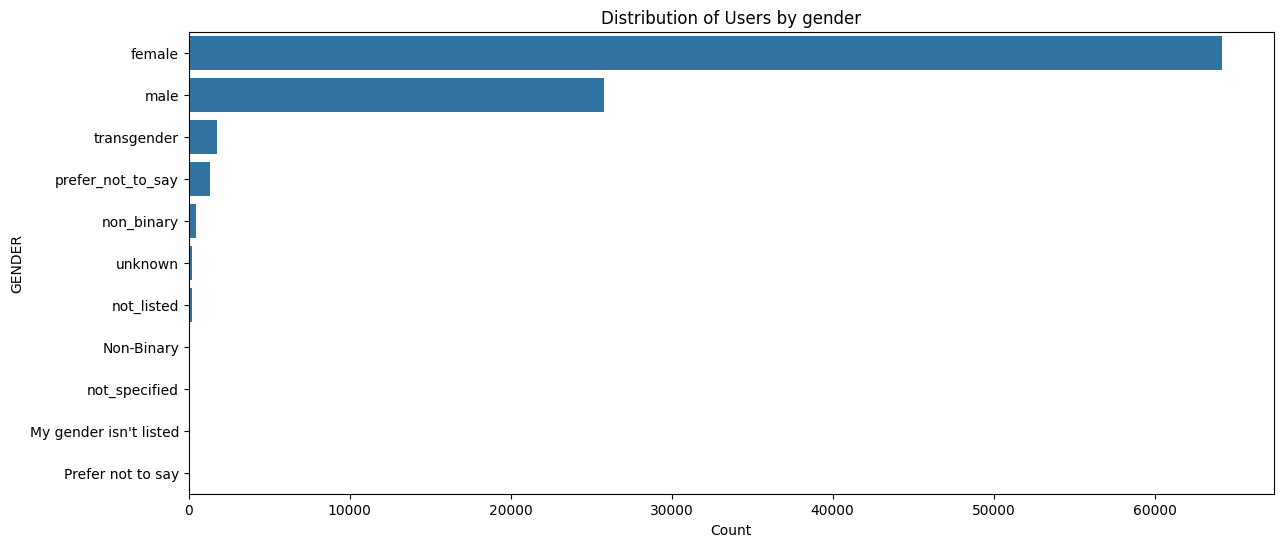

In [ ]:
# Distrbution of users by Gender
plt.figure(figsize=(14,6))
sns.countplot(y=user["GENDER"], order=user["GENDER"].value_counts().index)
plt.title("Distribution of Users by gender")
plt.xlabel("Count")
plt.show()

In [ ]:
# Loading the transformed data back into the CSV
user.to_csv('cleaned_data_user.csv', index=False)


##**Understanding and cleaning the "Products" file**

This part includes:
*   Handling Null values
*   Converting the fields into appropriate data type
*   Visualizing distribution of Product categories





In [ ]:
# Loading the file into dataframe
products = pd.read_csv('/content/PRODUCTS_TAKEHOME.csv')
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [ ]:
# Check for null values
products.isnull().sum()

,0
CATEGORY_1,16
CATEGORY_2,192
CATEGORY_3,8183
CATEGORY_4,106737
MANUFACTURER,31233
BRAND,31233
BARCODE,557


*Data Quality Issue #2*

Seeing the above null values table, we can infer that almost 95% of the data from the "Category_4" column is missing, a similar trend is observed in the fields like "Manufacturer" and "Brand". This can be qualified as a key data entry issue.

In [ ]:
# Check data types
products.dtypes

,0
CATEGORY_1,object
CATEGORY_2,object
CATEGORY_3,object
CATEGORY_4,object
MANUFACTURER,object
BRAND,object
BARCODE,float64


In [ ]:
# Drop null values in "Barcode" since "Barcode" is our unique key
products.dropna(subset=['BARCODE'], inplace=True)
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [ ]:
# Convert barcode into int
products['BARCODE'] = products['BARCODE'].astype(int)

In [ ]:
#Checking for data types
products.dtypes

,0
CATEGORY_1,object
CATEGORY_2,object
CATEGORY_3,object
CATEGORY_4,object
MANUFACTURER,object
BRAND,object
BARCODE,int64


In [ ]:
# Identify the number of unique categories in every category

num_unique_categories_1 = products['CATEGORY_1'].nunique()
num_unique_categories_2 = products['CATEGORY_2'].nunique()
num_unique_categories_3 = products['CATEGORY_3'].nunique()
num_unique_categories_4 = products['CATEGORY_4'].nunique()
print("Number of unique categories in CATEGORY_1:", num_unique_categories_1)
print("Number of unique categories in CATEGORY_2:", num_unique_categories_2)
print("Number of unique categories in CATEGORY_3:", num_unique_categories_3)
print("Number of unique categories in CATEGORY_4:", num_unique_categories_4)


Number of unique categories in CATEGORY_1: 27
Number of unique categories in CATEGORY_2: 121
Number of unique categories in CATEGORY_3: 341
Number of unique categories in CATEGORY_4: 126


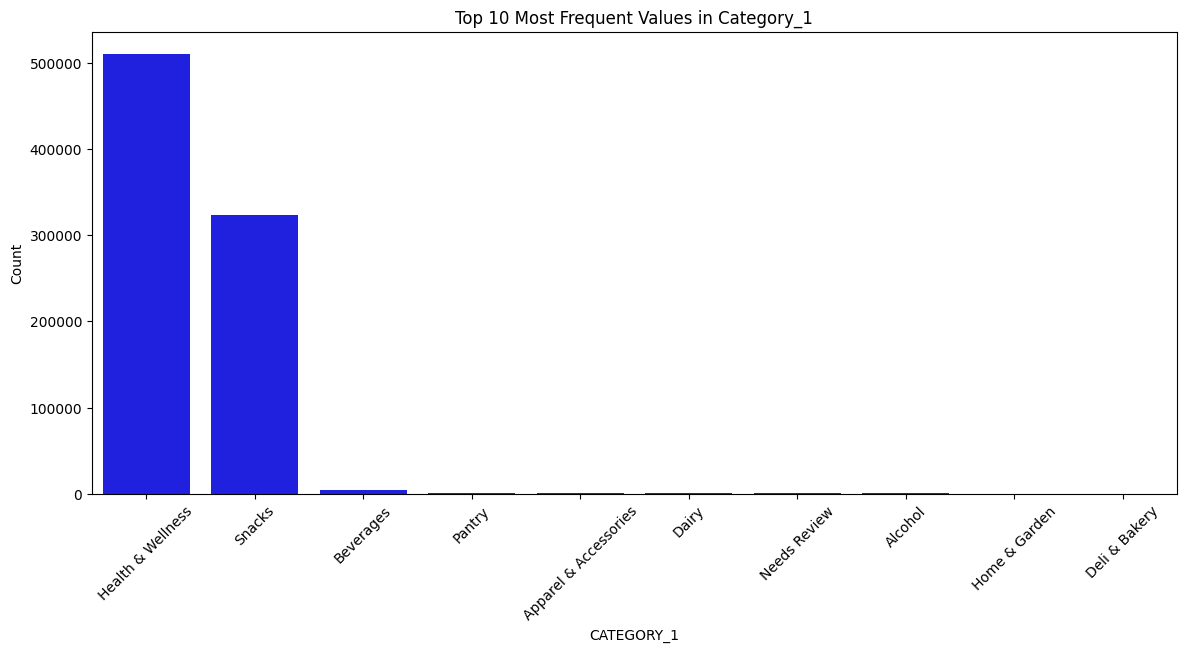

In [ ]:
# Viewing the most frequent category listed in "Category_1"
plt.figure(figsize=(14,6))
sns.barplot(x=products["CATEGORY_1"].value_counts().index[:10], y=products["CATEGORY_1"].value_counts().values[:10], color="blue")
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Values in Category_1")
plt.ylabel("Count")
plt.show()


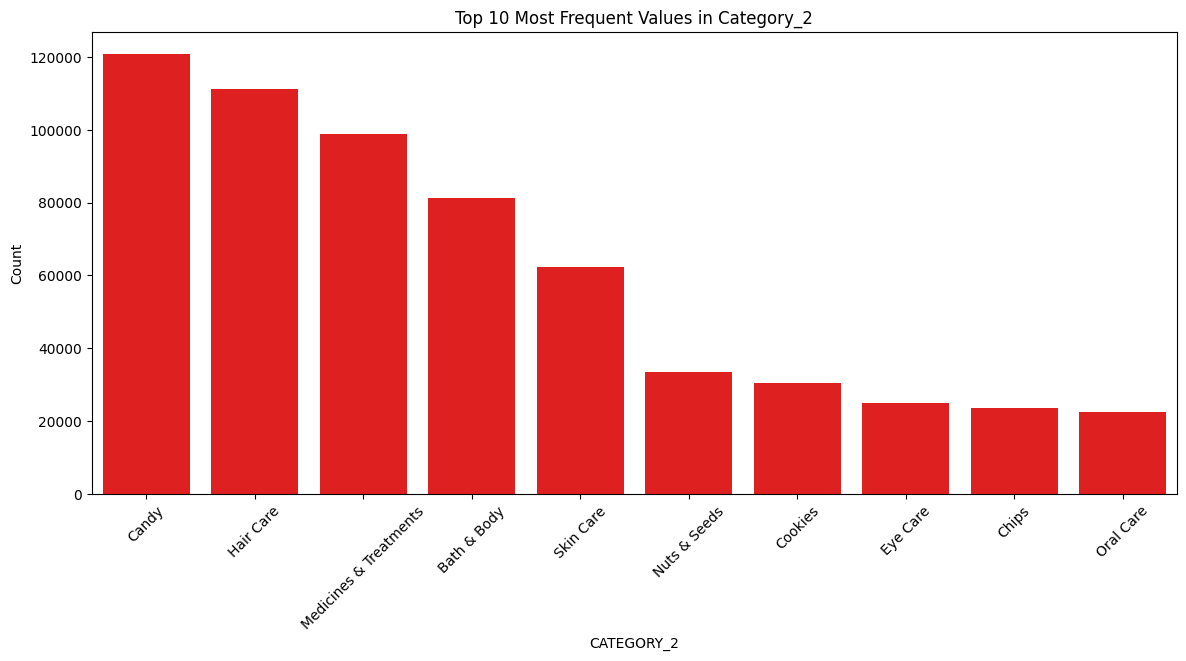

In [ ]:
# Viewing the most frequent category listed in "Category_2"
plt.figure(figsize=(14,6))
sns.barplot(x=products["CATEGORY_2"].value_counts().index[:10], y=products["CATEGORY_2"].value_counts().values[:10], color="red")
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Values in Category_2")
plt.ylabel("Count")
plt.show()

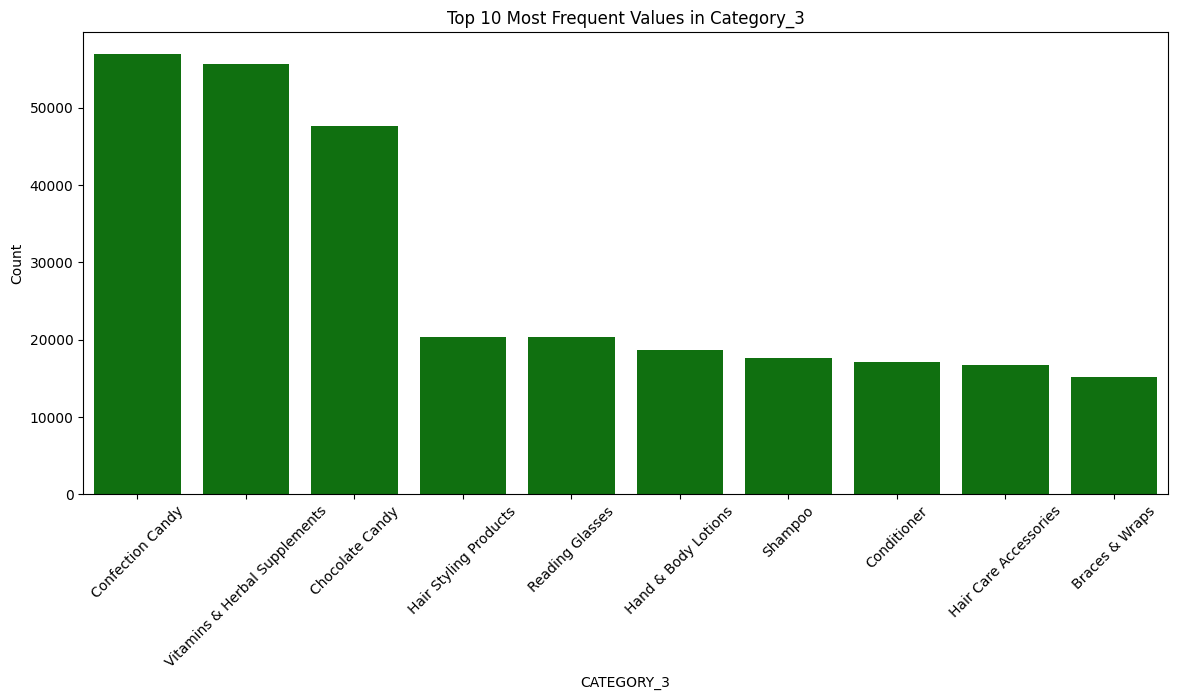

In [ ]:
# Viewing the most frequent category listed in "Category_3"
plt.figure(figsize=(14,6))
sns.barplot(x=products["CATEGORY_3"].value_counts().index[:10], y=products["CATEGORY_3"].value_counts().values[:10], color="green")
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Values in Category_3")
plt.ylabel("Count")
plt.show()


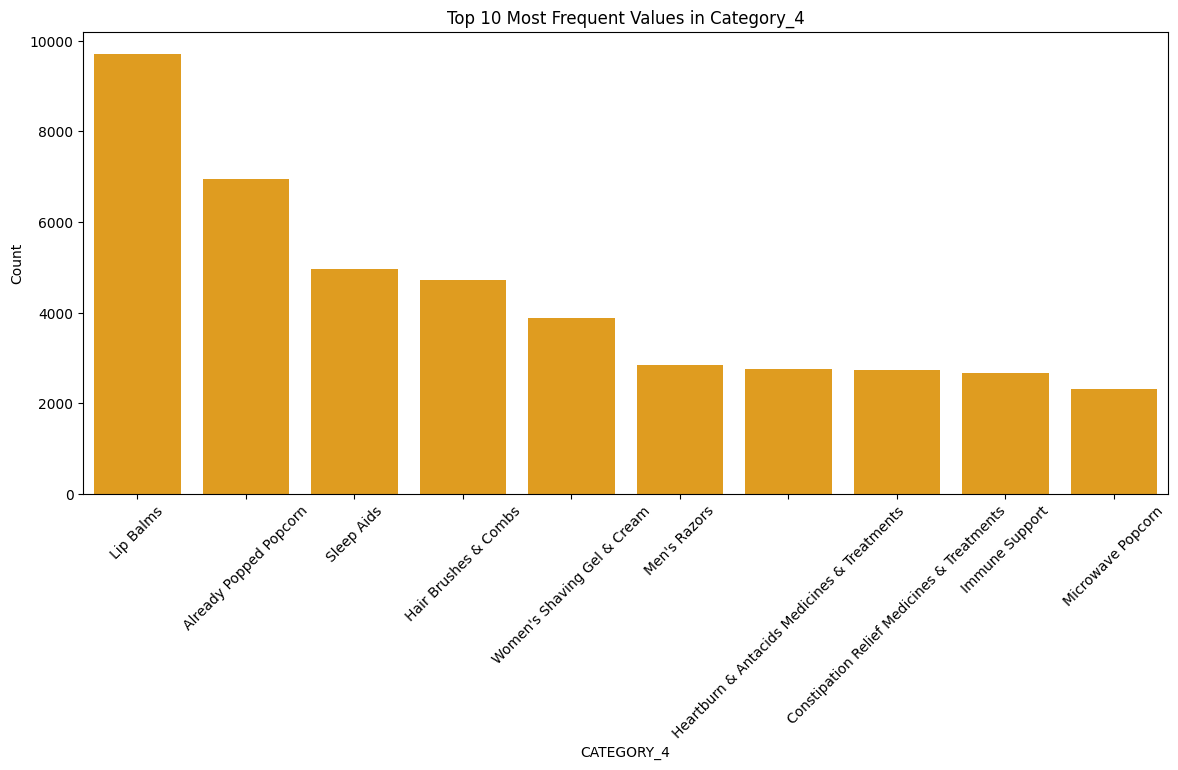

In [ ]:
# Viewing the most frequent category listed in "Category_4"
plt.figure(figsize=(14,6))
sns.barplot(x=products["CATEGORY_4"].value_counts().index[:10], y=products["CATEGORY_4"].value_counts().values[:10], color="orange")
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Values in Category_4")
plt.ylabel("Count")
plt.show()


In [ ]:
# Loading the transformed data back into CSV
products.to_csv('cleaned_data_products.csv', index=False)

##**Understanding and cleaning the "Transacation" file**

This part includes:
*   Handling Null values
*   Converting the fields into appropriate data type


In [ ]:
# Load the dataset into a pandas dataframe
transaction = pd.read_csv('/content/TRANSACTION_TAKEHOME.csv')
transaction.head(100)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
95,0100033c-885b-450c-9535-8cfd5cd557cc,2024-06-28,2024-06-30 13:53:43.751 Z,NELES GRANACOT,62d18ffda34160b30032e5a8,NaN,zero,2.99
96,0100e8c3-516d-480c-960e-11d02f5c4b4f,2024-06-24,2024-06-25 09:04:39.119 Z,WALMART,5b606e61c55fdc0f3d440923,7.874237e+10,1.00,
97,0101b75f-fd7f-4e37-bbf3-c9432718634c,2024-08-02,2024-08-02 16:04:59.880 Z,TRADER JOE'S,61a2b169002d3d2355c99bd8,NaN,zero,1.09
98,01037c5c-a022-40d0-a694-00bafcd61f8b,2024-08-18,2024-08-18 10:41:41.061 Z,TARGET,62578512bb76b54a63a1e117,3.700098e+10,1.00,


In [ ]:
# Check for the data types
transaction.dtypes

,0
RECEIPT_ID,object
PURCHASE_DATE,object
SCAN_DATE,object
STORE_NAME,object
USER_ID,object
BARCODE,float64
FINAL_QUANTITY,object
FINAL_SALE,object


In [ ]:
# Converting the data type for "FINAL_QUANTITY" and "FINAL_SALE"

transaction['FINAL_QUANTITY'] = pd.to_numeric(transaction['FINAL_QUANTITY'], errors='coerce')
transaction['FINAL_SALE'] = pd.to_numeric(transaction['FINAL_SALE'], errors='coerce')

In [ ]:
# Converting the "PURCHASE_DATE" as date time data type

transaction['PURCHASE_DATE'] = pd.to_datetime(transaction['PURCHASE_DATE'], errors='coerce')

In [ ]:
# Converting the "SCAN_DATE" as date time data type

transaction['SCAN_DATE'] = pd.to_datetime(transaction['SCAN_DATE'], errors='coerce')

In [ ]:
# Check for data types
transaction.dtypes

,0
RECEIPT_ID,object
PURCHASE_DATE,datetime64[ns]
SCAN_DATE,datetime64[ns]
STORE_NAME,object
USER_ID,object
BARCODE,float64
FINAL_QUANTITY,float64
FINAL_SALE,float64


In [ ]:
# Reviewing the data type to identify any data quality issues present
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20,ALDI,62c08877baa38d1a1f6c211a,NaN,NaN,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,NaN,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,NaN


In [ ]:
# Checking for null values
transaction.isnull().sum()

,0
RECEIPT_ID,0
PURCHASE_DATE,0
SCAN_DATE,0
STORE_NAME,0
USER_ID,0
BARCODE,5762
FINAL_QUANTITY,12500
FINAL_SALE,12500


*Data Quality Issue #3*

From the above table, we can see that there exists null values for quantity and sale fields, this can be a major data quality issue because we are not able to account for the number of quantities sold and the value of sale which can restrict us form deeper analysis about the user buying behavior.

In [ ]:
# Dropping null values of "Barcode"
transaction.dropna(subset=['BARCODE'], inplace=True)
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,NaN
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,NaN,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,NaN
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,NaN,1.46


In [ ]:
transaction.isnull().sum()

,0
RECEIPT_ID,0
PURCHASE_DATE,0
SCAN_DATE,0
STORE_NAME,0
USER_ID,0
BARCODE,0
FINAL_QUANTITY,11076
FINAL_SALE,11043


In [ ]:
# Convert "BARCODE" into int data type
transaction['BARCODE'] = transaction['BARCODE'].astype(int)

In [ ]:
# Replace NaN (null) values in 'FINAL_QUANTITY' with 0
transaction['FINAL_QUANTITY'] = transaction['FINAL_QUANTITY'].fillna(0)

In [ ]:
transaction['FINAL_QUANTITY'] = transaction['FINAL_QUANTITY'].astype(int)

In [ ]:
# Replace NaN (null) values in 'FINAL_SALE' with 0
transaction['FINAL_SALE'] = transaction['FINAL_SALE'].fillna(0)

In [ ]:
# Convert 'FINAL_SALE' to int (this will remove the decimal part)
transaction['FINAL_SALE'] = transaction['FINAL_SALE'].astype(int)

In [ ]:
# Checking if the above transformations have been successfully applied
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21,WALMART,63b73a7f3d310dceeabd4758,15300014978,1,0
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19,WALMART,60842f207ac8b7729e472020,78742229751,1,0
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,0,3
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1,0
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24,WALMART,5dcc6c510040a012b8e76924,681131411295,0,1


In [ ]:
# Check for data types
transaction.dtypes

,0
RECEIPT_ID,object
PURCHASE_DATE,datetime64[ns]
SCAN_DATE,datetime64[ns]
STORE_NAME,object
USER_ID,object
BARCODE,int64
FINAL_QUANTITY,int64
FINAL_SALE,int64


In [ ]:
# Store data into CSV
transaction.to_csv('cleaned_data_transaction.csv', index=False)